### Rosenblatt's Perceptron Rule
Frank Rosenblatts perceptron learning rule based on the MCP neuron model <br>
(F. Rosenblatt, The Perceptron, a Percieving and Recognizing Automaton. Cornell Aeronautical Laboratory, 1957).


Algorithm that automatically learns the optimal weight coefficients that are then multiplied with the input features in order to make the decision of whether a neuron is executed or not. (Supervised learning & binary classification)<br>

<b>Initial perceptron rule can be summaried by the following steps<br></b>
1. Initalize the weights to 0 or small random numbers.
2. For each training sample, $x^i$ perform the following steps:
    1. Compute the output value $ŷ$.
    2. Update the weights



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Used for plot_decision_regions
from matplotlib.colors import ListedColormap

#%matplotlib notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 10)

In [11]:
class Perceptron(object):
    """
    Perceptron classifier.
    
    Parameters
    ----------
    eta : float, learning rate (between 0.0 and 1.0)
    n_inter : int, number of passes over the training dataset.
    
    
    Attributes
    ----------
    w_ : 1d-array, weights after fitting
    errors_ : list, number of misclassifications in every epoch
    
    """
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """
        Fitting the training data
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features], 
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        Y : {array-like}, shape = [n_samples], Target values
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """ Calculate the net input """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [12]:
# dataset located here; https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
df = pd.read_csv('../data/irisdata-perceptron.csv', header=None)

In [13]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
4    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


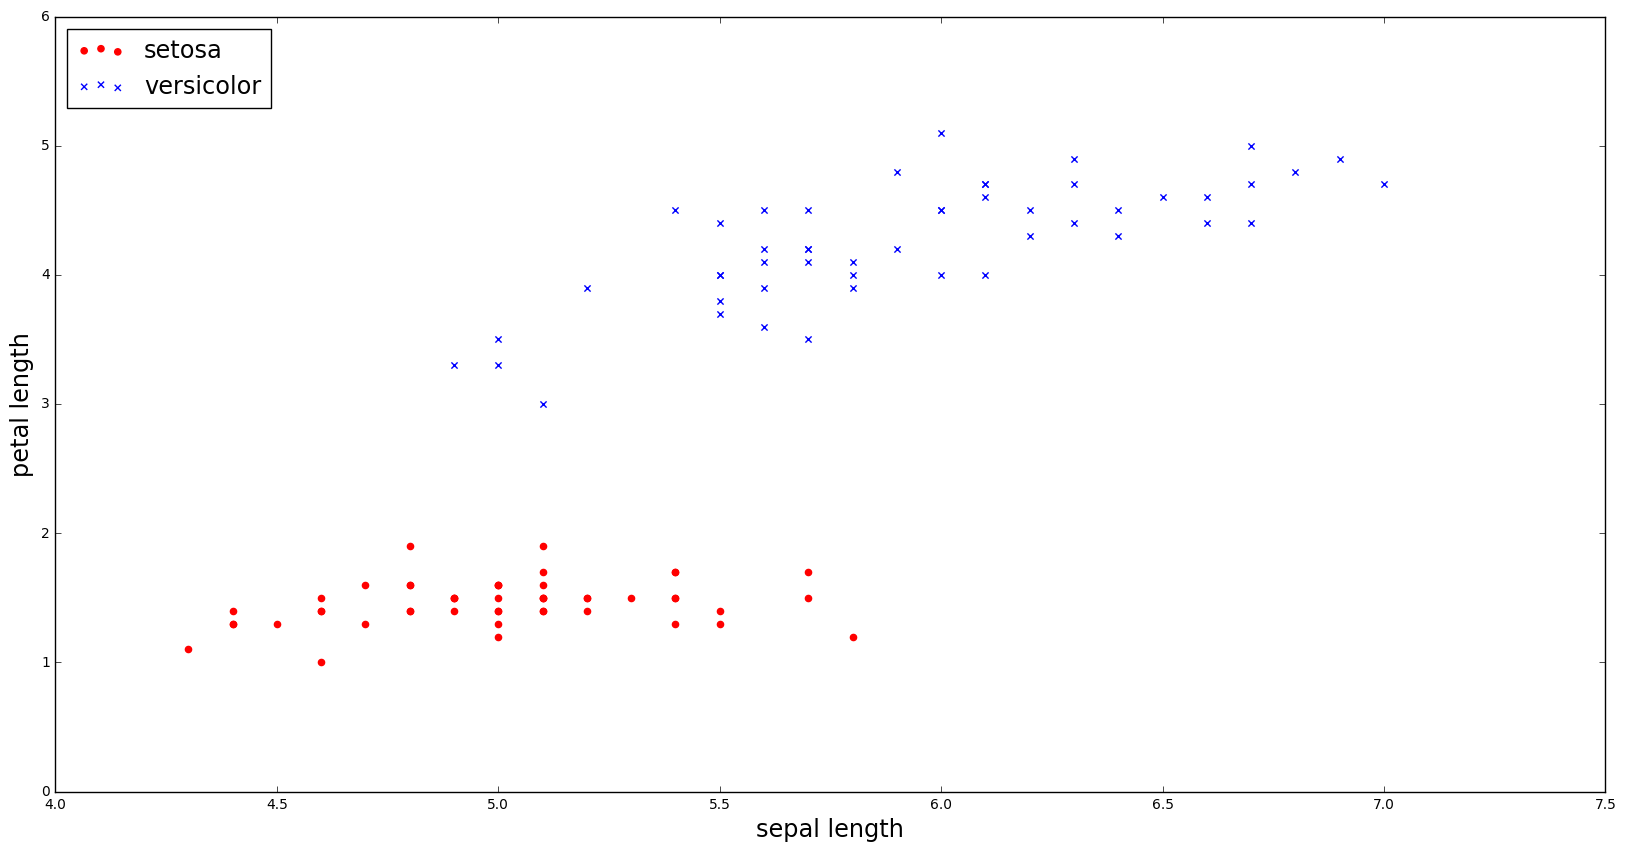

In [15]:
# Extract the first 100 class labels
y = df.iloc[0:100, 4].values

# Convert labels into two integer class labels
# 1 (Versicolor), -1 (Setosa) 

y = np.where(y == 'Iris-setosa', -1, 1)

# Extract the first feature (sepal length) and third feature (petal length)
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length', fontsize='xx-large')
plt.ylabel('petal length', fontsize='xx-large')
plt.legend(loc='upper left', fontsize='xx-large', )

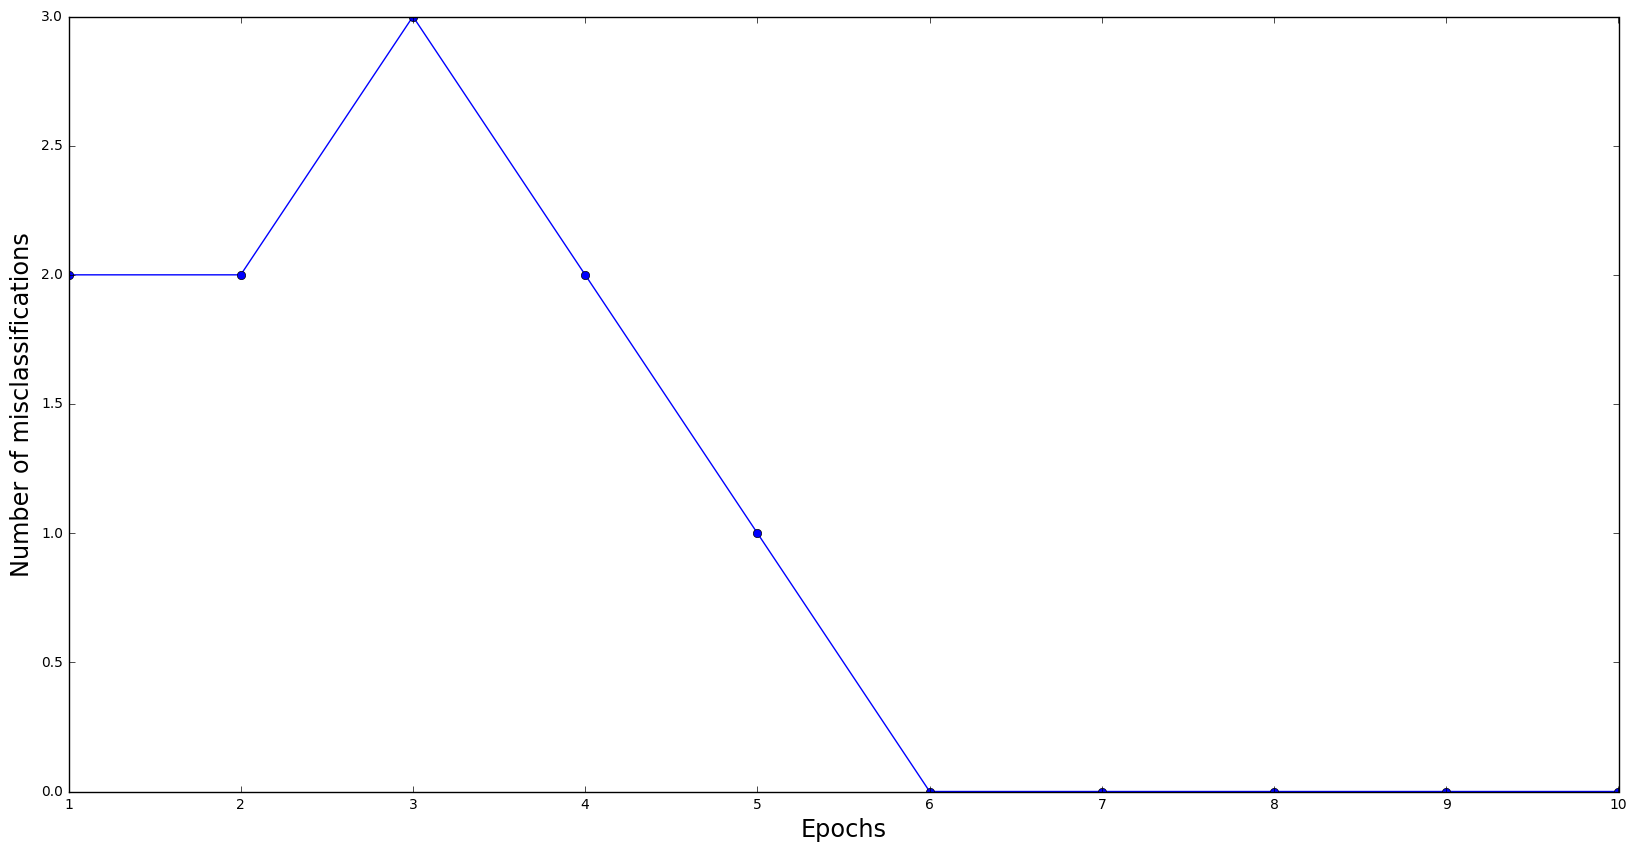

In [24]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

ax = plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')

plt.xlabel('Epochs', fontsize='xx-large')
plt.ylabel('Number of misclassifications', fontsize='xx-large')


plt.show()

# Perceptron converged after the sixth epoch.

In [17]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

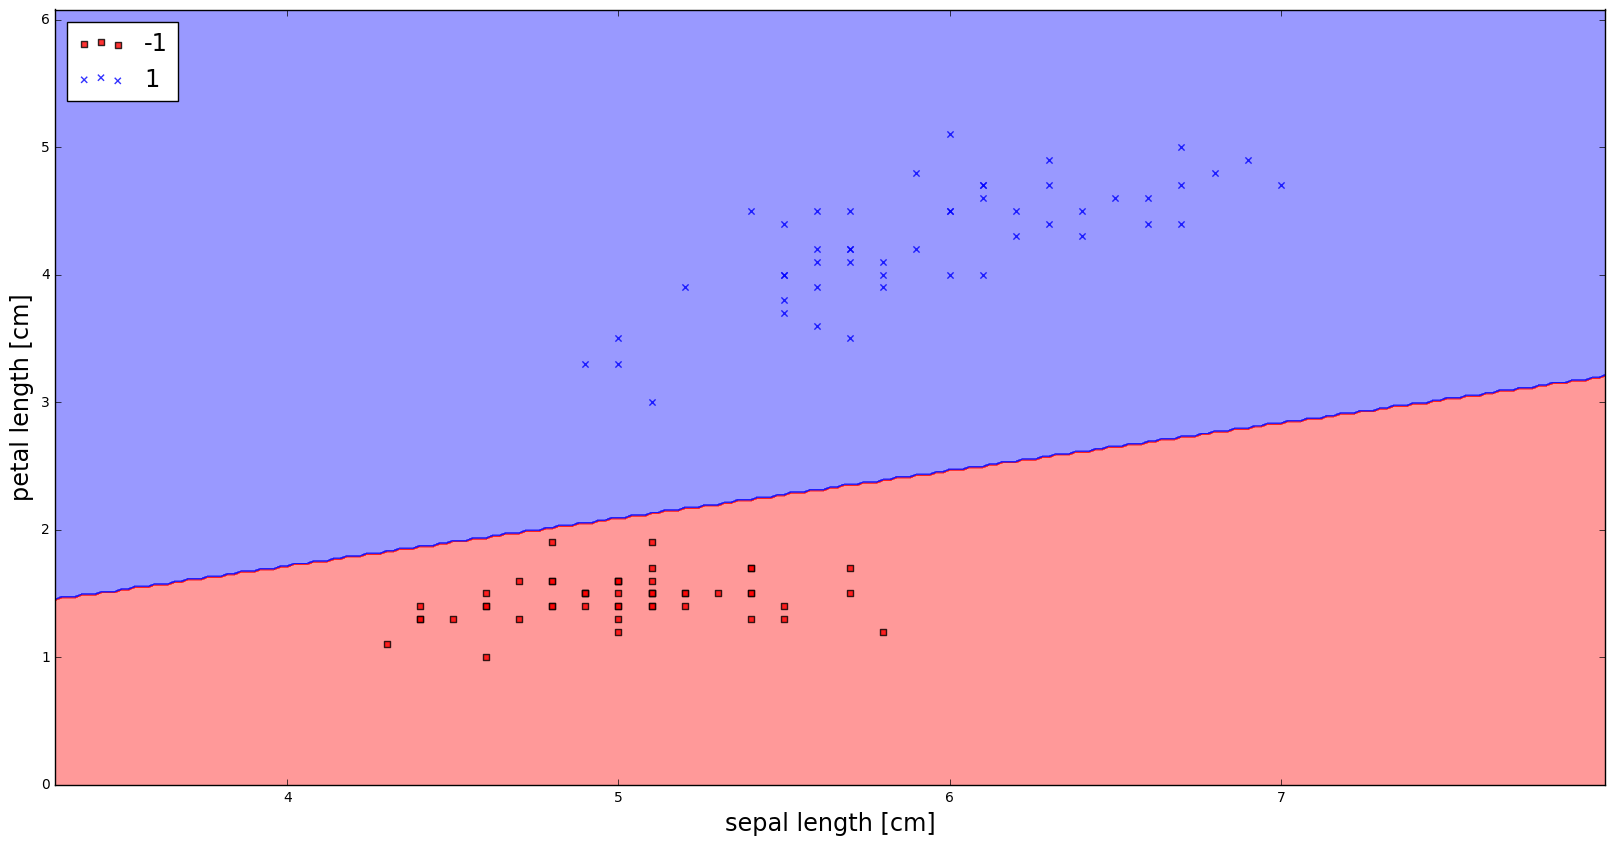

In [18]:
plot_decision_regions(X, y, classifier=ppn)

plt.xlabel('sepal length [cm]', fontsize='xx-large')
plt.ylabel('petal length [cm]', fontsize='xx-large')
plt.legend(loc='upper left', fontsize='xx-large', )

In [19]:
# System Information
%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.5.1 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 5.1.0
OS Darwin 15.6.0 x86_64 i386 64bit
numpy 1.11.1
scipy 0.18.0
matplotlib 1.5.3
pandas 0.18.1
Thu Sep 22 20:00:26 2016 PDT